In [29]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt


In [68]:
filename='../Parallel'
f = open(filename,'r')

dist_time = {}
seq_time = {}
dist_time = {}
counter = 0
diff_vals = {}
par_time = {}
line = f.readline().rstrip()
while(line):
    dist = line.split(' ')
    if dist and len(dist) == 3:
        posts = int(dist[1])
        apps = int(dist[0])
        time = int(dist[2])
        diff = posts - apps
        if diff in diff_vals:
            diff_vals[diff].append(apps)
            par_time[diff].append(time)
        else:
            print(diff)
            diff_vals[diff] = [apps]
            par_time[diff] = [time]
        line = f.readline().rstrip()

f = open('../Sequential','r')
line = f.readline().rstrip()
while(line):
    dist = line.split(' ')
    if dist and len(dist) == 3:
        posts = int(dist[1])
        apps = int(dist[0])
        time = int(dist[2])
        diff = posts - apps
        if diff in seq_time:
            seq_time[diff].append(time)
        else:
            seq_time[diff] = [time]
        line = f.readline().rstrip()

f = open('../Distributed','r')
line = f.readline().rstrip()
while(line):
    dist = line.split(' ')
    if dist and len(dist) == 3:
        posts = int(dist[1])
        apps = int(dist[0])
        time = int(dist[2])
        diff = posts - apps
        if diff in dist_time:
            dist_time[diff].append(time)
        else:
            dist_time[diff] = [time]
        line = f.readline().rstrip()

0


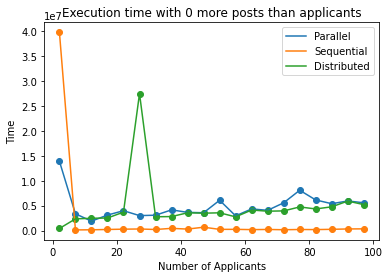

0


<Figure size 432x288 with 0 Axes>

In [70]:
for t in par_time:
    plt.xlabel('Number of Applicants')
    plt.ylabel('Time')
    title = 'Execution time with ' + str(t) + ' more posts than applicants'
    plt.plot(diff_vals[t], par_time[t], label='Parallel')
    plt.plot(diff_vals[t], seq_time[t], label='Sequential')
    plt.plot(diff_vals[t], dist_time[t], label='Distributed')
    plt.scatter(diff_vals[t], par_time[t])
    plt.scatter(diff_vals[t], seq_time[t])
    plt.scatter(diff_vals[t], dist_time[t])
    plt.legend()
    plt.title(title)
    plt.show()
#     plt.savefig(title+'.png')
    plt.clf()
    print(t)

2 1820700
7 1389800
12 1604600
17 2200300
22 1130700
27 1924000
32 1476700
37 2398100
42 3117200
47 3109700
52 2656100
57 2897900
62 2933200
67 3017500
72 2789300
77 3765700
82 2950800
87 3782900
92 3707300
97 5221700
102 4656300


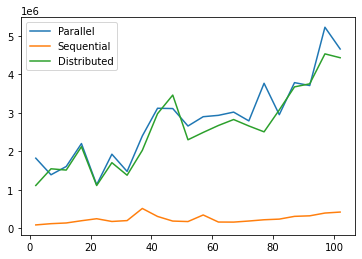

In [60]:
plt.plot(diff_vals[5], par_time[5], label='Parallel')
plt.plot(diff_vals[5], seq_time[5], label='Sequential')
plt.plot(diff_vals[5], dist_time[5], label='Distributed')
plt.legend()
plt.show()

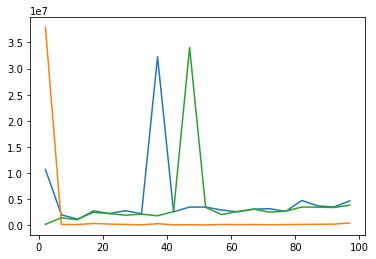

In [57]:

plt.plot(diff_vals[0], par_time[0], label='Parallel')
plt.plot(diff_vals[0], seq_time[0], label='Sequential')
plt.plot(diff_vals[0], dist_time[0], label='Distributed')

In [23]:
#input
num_posts = 9
num_apps = 8
pref_list = {
    0:[0,3,4,1,5],
    1:[3,4,6,1,7],
    2:[3,0,2,7],
    3:[0,6,3,2,8],
    4:[4,0,6,1,5],
    5:[6,5],
    6:[6,3,7,1],
    7:[6,3,0,4,8,2]
}

In [78]:
def get_post_list(app_list):
    post_list = {}
    deg_post_list = {}
    for p in range(num_posts):
        post_list[p] = [0]*num_apps
        deg_post_list[p] = 0
    for p in app_list:
        lst = app_list[p]
        for i in lst:
            post_list[i][p] = 1
            deg_post_list[i] += 1
    return post_list, deg_post_list

def get_app_list(post_list, adj_mat = False):
    app_list = {}
    deg_app_list = {}
    for p in range(num_apps):
        app_list[p] = [0]*num_posts
        deg_app_list[p] = 0
    for p in post_list:
        lst = post_list[p]
        if adj_mat:
            for i in range(len(lst)):
                if lst[i] == 1:
                    app_list[i][p] = 1
                    deg_app_list[i] += 1
        else:
            for i in lst:
                app_list[i][p] = 1
                deg_app_list[i] += 1
                
    return app_list, deg_app_list


In [28]:
f_posts = []
f_posts_indexed = [-1]*(np.max(list(pref_list.keys()))+1)
for p in pref_list:
    f_posts.append(pref_list[p][0])
    f_posts_indexed[p] = pref_list[p][0]
    
f_posts = set(f_posts)
print(f_posts_indexed)
s_posts_indexed = [-1]*(np.max(list(pref_list.keys()))+1)
for p in pref_list:
    lst = pref_list[p]
    for i in lst:
        if i in f_posts:
            continue
        else:
            s_posts_indexed[p] = i
            break
print(s_posts_indexed)
s_posts = set(s_posts_indexed)

[0, 3, 3, 0, 4, 6, 6, 6]
[1, 1, 2, 2, 1, 5, 7, 8]


In [33]:
red_G = {}
for p in pref_list:
    lst = pref_list[p]
    red_G[p]=[lst[0]] #append the f-post of p
    for i in lst:
        if i in s_posts:
            red_G[p].append(i)
            break
for r in red_G:
    print(red_G[r])

[0, 1]
[3, 1]
[3, 2]
[0, 2]
[4, 1]
[6, 5]
[6, 7]
[6, 8]


In [95]:

print(red_al)

{0: [1, 1, 0, 0, 0, 0, 0, 0, 0], 1: [0, 1, 0, 1, 0, 0, 0, 0, 0], 2: [0, 0, 1, 1, 0, 0, 0, 0, 0], 3: [1, 0, 1, 0, 0, 0, 0, 0, 0], 4: [0, 1, 0, 0, 1, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 1, 0, 0], 6: [0, 0, 0, 0, 0, 0, 1, 1, 0], 7: [0, 0, 0, 0, 0, 0, 1, 0, 1]}


In [109]:
#reduced graph:
red_pl, deg_red_pl = get_post_list(red_G)

red_al, deg_red_al = get_app_list(red_pl, True)
print(red_pl, '\n', red_al)

red_pl[0][0] = 1000

print(red_pl, '\n',red_al)

{0: [1, 0, 0, 1, 0, 0, 0, 0], 1: [1, 1, 0, 0, 1, 0, 0, 0], 2: [0, 0, 1, 1, 0, 0, 0, 0], 3: [0, 1, 1, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 1, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 0, 0], 6: [0, 0, 0, 0, 0, 1, 1, 1], 7: [0, 0, 0, 0, 0, 0, 1, 0], 8: [0, 0, 0, 0, 0, 0, 0, 1]} 
 {0: [1, 1, 0, 0, 0, 0, 0, 0, 0], 1: [0, 1, 0, 1, 0, 0, 0, 0, 0], 2: [0, 0, 1, 1, 0, 0, 0, 0, 0], 3: [1, 0, 1, 0, 0, 0, 0, 0, 0], 4: [0, 1, 0, 0, 1, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 1, 0, 0], 6: [0, 0, 0, 0, 0, 0, 1, 1, 0], 7: [0, 0, 0, 0, 0, 0, 1, 0, 1]}
{0: [1000, 0, 0, 1, 0, 0, 0, 0], 1: [1, 1, 0, 0, 1, 0, 0, 0], 2: [0, 0, 1, 1, 0, 0, 0, 0], 3: [0, 1, 1, 0, 0, 0, 0, 0], 4: [0, 0, 0, 0, 1, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 0, 0], 6: [0, 0, 0, 0, 0, 1, 1, 1], 7: [0, 0, 0, 0, 0, 0, 1, 0], 8: [0, 0, 0, 0, 0, 0, 0, 1]} 
 {0: [1, 1, 0, 0, 0, 0, 0, 0, 0], 1: [0, 1, 0, 1, 0, 0, 0, 0, 0], 2: [0, 0, 1, 1, 0, 0, 0, 0, 0], 3: [1, 0, 1, 0, 0, 0, 0, 0, 0], 4: [0, 1, 0, 0, 1, 0, 0, 0, 0], 5: [0, 0, 0, 0, 0, 1, 1, 0, 0], 6: [0, 0, 0, 0, 0, 

In [140]:
#algo1
M = []
red_pl, deg_red_pl = get_post_list(red_G)

red_al, deg_red_al = get_app_list(red_pl, True)

deg_1_posts = []
for d in deg_red_pl:
    if deg_red_pl[d] == 1:
        deg_1_posts.append(d)

for d in deg_red_al:
    if deg_red_al[d] == 0:
        deg_zero_app += 1
        
deg_zero_post = 0
deg_zero_app = 0
while(len(deg_1_posts) > 0):
    p = deg_1_posts[0]
    print('degree of',p,deg_red_pl[p])
    while p != -1:
        lst = red_pl[p]
        app = -1
        for i in range(len(lst)): # find an applicant that is linked to the post
            if lst[i] == 1:
                app = i 
                break

        M.append((app,p)) # add deg1 post to matching


        for post in red_pl:
            if red_pl[post][app] == 1:
                red_pl[post][app] = 0
                deg_red_pl[post] -= 1
                if deg_red_pl[post] == 1:
                    deg_1_posts.append(post)
                    print('added', post)
                elif deg_red_pl[post] == 0:
                    deg_1_posts.remove(post)
                    deg_zero_post += 1
                    print('removed', post)
        deg_red_pl[p] = 0

        #in a distributed setting, can run the one degree check per node


        next_p = -1
        # update the reduced graphs and degree graphs
        for i in range(len(red_al[app])):
            if not i == p and red_al[app][i] == 1 and deg_red_pl[i] == 1: #take all even paths
                next_p = i
            red_al[app][i] = 0
        deg_red_al[app] = 0
        for app in red_al:
            if red_al[app][p] == 1:
                red_al[app][p] = 0
                deg_red_al[app] -= 1
            if deg_red_al[app] == 0:
                deg_zero_app += 1
        
        p = next_p
                
# if there are less posts with edges than applicants with edges, not all applicants will get a post
if (num_posts - deg_zero_post) < (num_apps - deg_zero_app):
    print((num_posts - deg_zero_post),(num_apps - deg_zero_app))
    print('no answer')
else:
    # break even cycles into matchings by first come first served:
    deg_many_posts = [] 
    for p in deg_red_pl:
        if deg_red_pl[p] > 0:
            deg_many_posts.append(p)
    
    while(len(deg_many_posts) > 0): #in case there are multiple disjoint cycles
        p = deg_many_posts[0] 
        while(p != -1): #for each cycle, look at every other edge to put into matching
            lst = red_pl[p]
            app = -1
            for i in range(len(lst)):
                if lst[i] == 1:
                    app = i
                    break
                    
            M.append((app, p))
            
            for i in red_al:
                if red_al[i][p] == 1:
                    red_al[i][p] = 0 
                    deg_red_al[i] -= 1

            for i in red_pl:
                if red_pl[i][app] == 1:
                    red_pl[i][app] = 0
                    deg_red_pl[i] -= 1
                if deg_red_pl[i] == 0 and i in deg_many_posts:
                    deg_many_posts.remove(i)

            next_p = -1
            print(app, p, next_p)
            
            if (deg_red_al[app]) == 0:
                print('done with a cycle')
            else:
                lst = red_al[app]
                for i in range(len(lst)):
                    if lst[i] == 1:
                        next_p = i

            if next_p == -1:
                break
            else:
                p = next_p
        


degree of 4 1
removed 4
degree of 5 1
removed 5
degree of 7 1
added 6
removed 7
removed 6
removed 8
0 0 -1
1 1 -1
2 3 -1
3 2 -1
done with a cycle


In [141]:
#algo2:
for r in red_pl:
    print(r, ':', red_pl[r])
print(M)

0 : [0, 0, 0, 0, 0, 0, 0, 0]
1 : [0, 0, 0, 0, 0, 0, 0, 0]
2 : [0, 0, 0, 0, 0, 0, 0, 0]
3 : [0, 0, 0, 0, 0, 0, 0, 0]
4 : [0, 0, 0, 0, 0, 0, 0, 0]
5 : [0, 0, 0, 0, 0, 0, 0, 0]
6 : [0, 0, 0, 0, 0, 0, 0, 0]
7 : [0, 0, 0, 0, 0, 0, 0, 0]
8 : [0, 0, 0, 0, 0, 0, 0, 0]
[(4, 4), (5, 5), (6, 7), (7, 6), (0, 0), (1, 1), (2, 3), (3, 2)]
